In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
x_train,x_val,y_train ,y_val = train_test_split(train_data,train_labels,
                                                
                                                random_state=2023)



# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))

404
102
검증 데이터: (101, 13) 레이블: (101,)


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

#val 데이터셋도 마찬가지
x_train = x_train - mean
x_train = x_train / std
x_val = x_val - mean
x_val = x_val / std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델은 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1], )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='relu'))
model.summary()

model.compile(loss='MSE',
              optimizer='SGD',
              metrics=['mae','mse'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras import models, layers, utils, optimizers

utils.plot_model(model)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(x_val, y_val))
                    

Epoch 1/200
10/10 [==============================] - 0s 15ms/step - loss: 556.4203 - mae: 19.5148 - mse: 556.4203 - val_loss: 441.1969 - val_mae: 17.8802 - val_mse: 441.1969
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 272.1960 - mae: 13.5403 - mse: 272.1960 - val_loss: 480.4106 - val_mae: 19.4591 - val_mse: 480.4106
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 301.3367 - mae: 14.7365 - mse: 301.3367 - val_loss: 90.4349 - val_mae: 6.4516 - val_mse: 90.4349
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 114.3249 - mae: 7.7035 - mse: 114.3249 - val_loss: 67.4300 - val_mae: 6.1264 - val_mse: 67.4300
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 87.3795 - mae: 6.0445 - mse: 87.3795 - val_loss: 50.4199 - val_mae: 4.6654 - val_mse: 50.4199
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 66.6120 - mae: 4.7978 - mse: 66.6120 - val_loss: 63.9876 - val_mae: 6.2027

10/10 [==============================] - 0s 3ms/step - loss: 5.4668 - mae: 1.6536 - mse: 5.4668 - val_loss: 8.7391 - val_mae: 2.2882 - val_mse: 8.7391
Epoch 51/200
10/10 [==============================] - 0s 3ms/step - loss: 6.0565 - mae: 1.7504 - mse: 6.0565 - val_loss: 7.8451 - val_mae: 2.2352 - val_mse: 7.8451
Epoch 52/200
10/10 [==============================] - 0s 3ms/step - loss: 5.6691 - mae: 1.7139 - mse: 5.6691 - val_loss: 8.6632 - val_mae: 2.3005 - val_mse: 8.6632
Epoch 53/200
10/10 [==============================] - 0s 3ms/step - loss: 5.6971 - mae: 1.6972 - mse: 5.6971 - val_loss: 8.7429 - val_mae: 2.3466 - val_mse: 8.7429
Epoch 54/200
10/10 [==============================] - 0s 3ms/step - loss: 5.4325 - mae: 1.6588 - mse: 5.4325 - val_loss: 7.9536 - val_mae: 2.2537 - val_mse: 7.9536
Epoch 55/200
10/10 [==============================] - 0s 3ms/step - loss: 5.2816 - mae: 1.6049 - mse: 5.2816 - val_loss: 9.3603 - val_mae: 2.4050 - val_mse: 9.3603
Epoch 56/200
10/10 [=========

Epoch 100/200
10/10 [==============================] - 0s 3ms/step - loss: 3.0700 - mae: 1.2607 - mse: 3.0700 - val_loss: 8.5180 - val_mae: 2.2153 - val_mse: 8.5180
Epoch 101/200
10/10 [==============================] - 0s 3ms/step - loss: 2.7403 - mae: 1.2069 - mse: 2.7403 - val_loss: 8.4583 - val_mae: 2.2046 - val_mse: 8.4583
Epoch 102/200
10/10 [==============================] - 0s 3ms/step - loss: 3.0211 - mae: 1.2736 - mse: 3.0211 - val_loss: 21.4797 - val_mae: 3.1625 - val_mse: 21.4797
Epoch 103/200
10/10 [==============================] - 0s 3ms/step - loss: 4.7645 - mae: 1.6308 - mse: 4.7645 - val_loss: 11.9263 - val_mae: 2.5070 - val_mse: 11.9263
Epoch 104/200
10/10 [==============================] - 0s 3ms/step - loss: 3.1485 - mae: 1.3391 - mse: 3.1485 - val_loss: 10.7961 - val_mae: 2.4437 - val_mse: 10.7961
Epoch 105/200
10/10 [==============================] - 0s 3ms/step - loss: 2.9370 - mae: 1.2320 - mse: 2.9370 - val_loss: 10.8502 - val_mae: 2.6449 - val_mse: 10.8502
Ep

10/10 [==============================] - 0s 3ms/step - loss: 1.9655 - mae: 1.0036 - mse: 1.9655 - val_loss: 7.5848 - val_mae: 2.1840 - val_mse: 7.5848
Epoch 150/200
10/10 [==============================] - 0s 3ms/step - loss: 1.8877 - mae: 0.9985 - mse: 1.8877 - val_loss: 8.2051 - val_mae: 2.2856 - val_mse: 8.2051
Epoch 151/200
10/10 [==============================] - 0s 3ms/step - loss: 1.9309 - mae: 1.0071 - mse: 1.9309 - val_loss: 7.4117 - val_mae: 2.1225 - val_mse: 7.4117
Epoch 152/200
10/10 [==============================] - 0s 3ms/step - loss: 3.0594 - mae: 1.2962 - mse: 3.0594 - val_loss: 7.9284 - val_mae: 2.0828 - val_mse: 7.9284
Epoch 153/200
10/10 [==============================] - 0s 3ms/step - loss: 2.2364 - mae: 1.0756 - mse: 2.2364 - val_loss: 7.5880 - val_mae: 2.2023 - val_mse: 7.5880
Epoch 154/200
10/10 [==============================] - 0s 3ms/step - loss: 1.7324 - mae: 0.9326 - mse: 1.7324 - val_loss: 7.3692 - val_mae: 2.1203 - val_mse: 7.3692
Epoch 155/200
10/10 [===

Epoch 199/200
10/10 [==============================] - 0s 3ms/step - loss: 1.2703 - mae: 0.7760 - mse: 1.2703 - val_loss: 7.5391 - val_mae: 2.2035 - val_mse: 7.5391
Epoch 200/200
10/10 [==============================] - 0s 3ms/step - loss: 1.2560 - mae: 0.7956 - mse: 1.2560 - val_loss: 8.4398 - val_mae: 2.3069 - val_mse: 8.4398


In [7]:
history.history

{'loss': [556.4202880859375,
  272.19598388671875,
  301.3367004394531,
  114.32490539550781,
  87.37947845458984,
  66.61203002929688,
  68.49272918701172,
  52.65888977050781,
  41.61697769165039,
  41.99445724487305,
  31.3431339263916,
  25.83139419555664,
  26.911352157592773,
  16.79807472229004,
  13.448579788208008,
  12.642224311828613,
  16.300363540649414,
  12.631211280822754,
  11.676173210144043,
  12.249695777893066,
  31.92877197265625,
  13.714858055114746,
  10.947027206420898,
  10.824790954589844,
  17.275611877441406,
  15.31047248840332,
  11.108339309692383,
  10.848655700683594,
  8.224440574645996,
  11.215291023254395,
  10.438679695129395,
  9.221829414367676,
  8.374683380126953,
  10.389993667602539,
  8.579277992248535,
  7.981751441955566,
  7.347316265106201,
  7.8332743644714355,
  7.659170150756836,
  6.67347526550293,
  8.068689346313477,
  6.958095550537109,
  5.969306945800781,
  6.656261444091797,
  6.141127109527588,
  6.22430944442749,
  6.646820

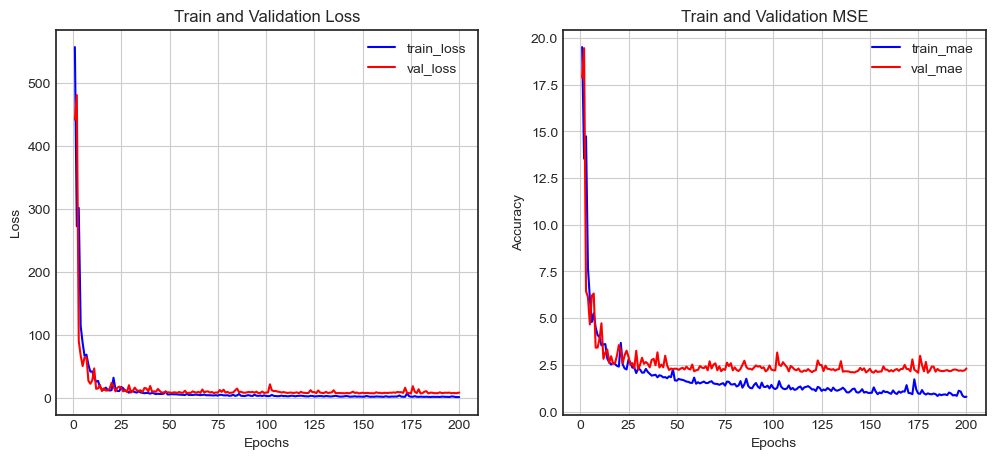

In [8]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MSE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [9]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 19.1602 - mae: 2.8925 - mse: 19.1602


[19.160173416137695, 2.89251971244812, 19.160173416137695]

# 회고 
 * 딥러닝 모델 평가를 해보았다.
 여러가지 막혔던 부분들이 있는데, 하나씩하나씩 해보고 나니, 질문도 해보고나니  알게되었다. 테스트 데이터와 검증데이터를 확실히 알고 해봐야 할것 같다. 여러 활성화 함수를 넣어봤는데, 각각 기능이 달랐던걸 알게되었다. 좀 더 공부와, 여러가지들을 해봐야 실력이 늘 것 같다. 